# **The Sparks Foundation Internship (GRIPFEB21)**

## Name : Rehan Raees

## TASK 4 : Exploratory Data Analysis - Terrorism

### Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
#### 1 - As a security/defense analyst, try to find out the hot zone of terrorism. 
#### 2 - What all security issues and insights you can derive by EDA?

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## Load the data

In [2]:
df = pd.read_csv('global_terrorism.csv',encoding = 'latin1',low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### Data Cleaning

In [4]:
data = df[['eventid', 'iyear', 'imonth', 'iday','country_txt', 'region_txt','provstate','city','attacktype1_txt',
          'targtype1_txt','weaptype1_txt','weapsubtype1_txt', 'nkill','nwoundte','gname']]
data.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,weaptype1_txt,weapsubtype1_txt,nkill,nwoundte,gname
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Unknown,NaN,1.0,NaN,MANO-D
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,NaN,0.0,NaN,23rd of September Communist League
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,NaN,1.0,NaN,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown Explosive Type,NaN,NaN,Unknown
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,NaN,Unknown


In [5]:
data.tail()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,weaptype1_txt,weapsubtype1_txt,nkill,nwoundte,gname
181686,201712310022,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Firearms,Unknown Gun Type,1.0,0.0,Al-Shabaab
181687,201712310029,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",2.0,0.0,Muslim extremists
181688,201712310030,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,Incendiary,Arson/Fire,0.0,0.0,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Explosives,Grenade,0.0,0.0,Unknown
181690,201712310032,2017,12,31,Philippines,Southeast Asia,Maguindanao,Cotabato City,Bombing/Explosion,Unknown,Explosives,Unknown Explosive Type,0.0,0.0,Unknown


In [6]:
# Renaming the coulmns
data.columns = ['id', 'year', 'month', 'day','country', 'region','state','city','attack_type',
          'target_type','weaptype','weapsubtype', 'fatalities','injury','gname']

In [7]:
data.head(7)

,id,year,month,day,country,region,state,city,attack_type,target_type,weaptype,weapsubtype,fatalities,injury,gname
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Unknown,NaN,1.0,NaN,MANO-D
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,NaN,0.0,NaN,23rd of September Communist League
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,NaN,1.0,NaN,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown Explosive Type,NaN,NaN,Unknown
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,NaN,Unknown
5,197001010002,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,Firearms,Unknown Gun Type,0.0,0.0,Black Nationalists
6,197001020001,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Firearms,Automatic or Semi-Automatic Rifle,0.0,NaN,Tupamaros (Uruguay)


### Data Analysis

In [8]:
data.shape

(181691, 15)

In [9]:
data.columns.values

array(['id', 'year', 'month', 'day', 'country', 'region', 'state', 'city',
       'attack_type', 'target_type', 'weaptype', 'weapsubtype',
       'fatalities', 'injury', 'gname'], dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           181691 non-null  int64  
 1   year         181691 non-null  int64  
 2   month        181691 non-null  int64  
 3   day          181691 non-null  int64  
 4   country      181691 non-null  object 
 5   region       181691 non-null  object 
 6   state        181270 non-null  object 
 7   city         181257 non-null  object 
 8   attack_type  181691 non-null  object 
 9   target_type  181691 non-null  object 
 10  weaptype     181691 non-null  object 
 11  weapsubtype  160923 non-null  object 
 12  fatalities   171378 non-null  float64
 13  injury       112548 non-null  float64
 14  gname        181691 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 20.8+ MB


In [11]:
# Missing values
missing_values = data.isnull().sum().reset_index()
missing_values.columns = ['items','Number of missing values']
missing_values

,items,Number of missing values
0,id,0
1,year,0
2,month,0
3,day,0
4,country,0
5,region,0
6,state,421
7,city,434
8,attack_type,0
9,target_type,0


In [12]:
data.corr()

,id,year,month,day,fatalities,injury
id,1.000000,0.999996,0.002706,0.018336,0.015351,0.027904
year,0.999996,1.000000,0.000139,0.018254,0.015341,0.027879
month,0.002706,0.000139,1.000000,0.005497,0.003463,0.005091
day,0.018336,0.018254,0.005497,1.000000,-0.003693,0.001812
fatalities,0.015351,0.015341,0.003463,-0.003693,1.000000,0.141016
injury,0.027904,0.027879,0.005091,0.001812,0.141016,1.000000


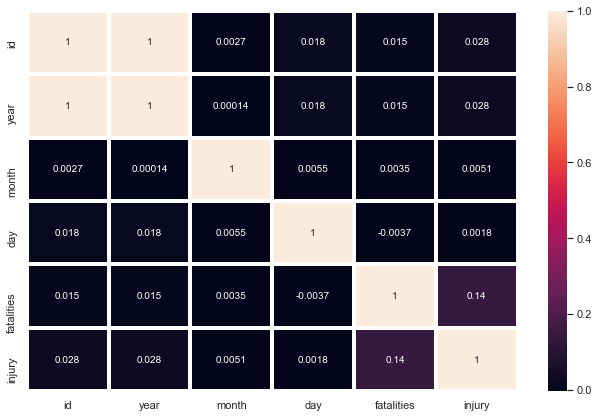

In [13]:
plt.figure(figsize = (11,7))
sns.heatmap(data.corr(),annot = True,linecolor = 'white',linewidth = 3)
plt.show()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: year, dtype: int64


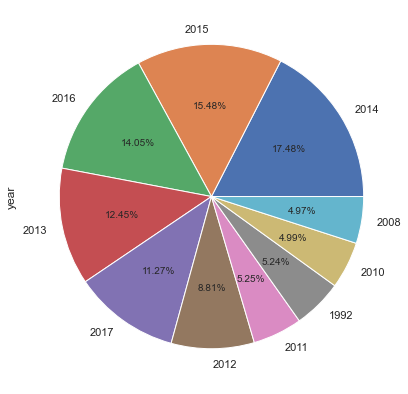

In [14]:
print(data['year'].value_counts().head(10))
plt.figure(figsize=(11,7))
data['year'].value_counts().head(10).plot.pie(autopct='%1.2f%%')
plt.show()

####  Most number of terror attacks are happend in the year 2014...!!!

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region, dtype: int64

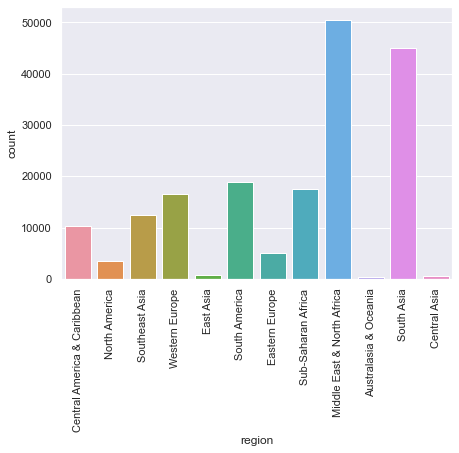

In [15]:
plt.figure(figsize =(7,5))
sns.countplot(x = data['region'])
plt.xticks(rotation = 90)

data['region'].value_counts().sort_values(ascending = False)

#### Regions Middle East & North Africa and South Asia are HOT ZONES of terrorism...!!!

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Name: country, dtype: int64


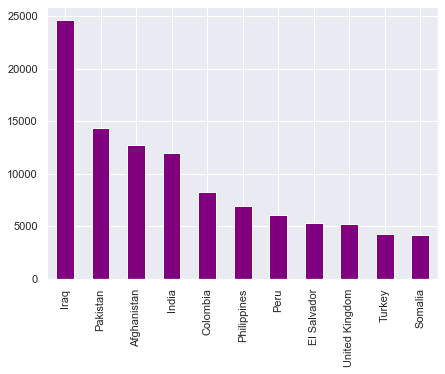

In [16]:
print(data['country'].value_counts().head(11))
plt.figure(figsize = (7,5))
data['country'].value_counts().head(11).plot(kind = 'bar',color = 'purple')
plt.show()

#### As per above analysis country Iraq is HOT ZONE of terrorism...!!!

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: city, dtype: int64


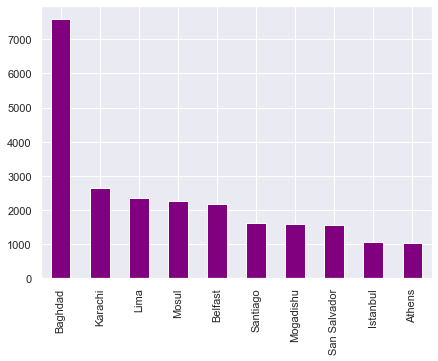

In [17]:
print(data['city'].value_counts()[1:11])
plt.figure(figsize = (7,5))
data['city'].value_counts()[1:11].plot(kind = 'bar',color = 'purple')
plt.show()

#### According to above analysis Baghdad city of Iraq is HOT ZONE of terrorism...!!!

In [30]:
# Fatalities and injuries (year wise)
data.groupby('year')[['fatalities','injury']].sum().tail(11)

,fatalities,injury
year,,
2007,12824.0,120.0
2008,9157.0,79.0
2009,9273.0,55.0
2010,7827.0,125.0
2011,8246.0,231.0
2012,15497.0,444.0
2013,22273.0,557.0
2014,44490.0,1848.0
2015,38853.0,2946.0


In [19]:
region_data = data.groupby('region')[['fatalities','injury']].sum().sort_values(by = 'fatalities',ascending = False)
region_data

,fatalities,injury
region,,
Middle East & North Africa,137642.0,2020.0
South Asia,101319.0,8161.0
Sub-Saharan Africa,78386.0,736.0
South America,28849.0,69.0
Central America & Caribbean,28708.0,21.0
Southeast Asia,15637.0,430.0
Eastern Europe,7415.0,474.0
Western Europe,6694.0,63.0
North America,4916.0,37.0


In [20]:
country_data = data.groupby(['country','state','city'])[['fatalities',
'injury']].sum().reset_index().sort_values(by = 'fatalities',ascending = False).head(10)
country_data

,country,state,city,fatalities,injury
17033,Iraq,Baghdad,Baghdad,21149.0,20.0
17819,Iraq,Nineveh,Mosul,7125.0,50.0
32331,Somalia,Banaadir,Mogadishu,3913.0,20.0
26785,Pakistan,Sindh,Karachi,3686.0,42.0
39412,United States,New York,New York City,2830.0,3.0
18167,Iraq,Saladin,Tikrit,2679.0,15.0
1261,Afghanistan,Kabul,Kabul,2493.0,9.0
16846,Iraq,Al Anbar,Ramadi,2312.0,34.0
23580,Nigeria,Borno,Maiduguri,2234.0,11.0
35291,Syria,Aleppo,Aleppo,2125.0,0.0


country
Iraq           78589.0
Afghanistan    39384.0
Pakistan       23822.0
Nigeria        22682.0
India          19341.0
Sri Lanka      15530.0
Syria          15229.0
Colombia       14698.0
Peru           12771.0
El Salvador    12053.0
Algeria        11066.0
Name: fatalities, dtype: float64


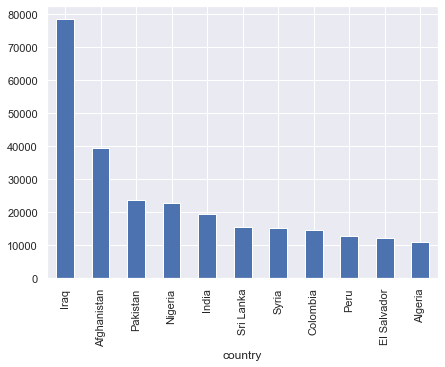

In [21]:
print(data.groupby('country')['fatalities'].sum().sort_values(ascending = False).head(11))
plt.figure(figsize=(7,5))
data.groupby('country')['fatalities'].sum().sort_values(ascending = False).head(11).plot(kind = 'bar')
plt.show()

In [22]:
data.groupby('state')['fatalities'].sum().sort_values(ascending = False).head(11)

state
Baghdad                                21215.0
Unknown                                15476.0
Nineveh                                15185.0
Borno                                  12063.0
Al Anbar                               12009.0
Saladin                                10673.0
Diyala                                  7779.0
Eastern                                 6323.0
Northern                                5955.0
Punjab                                  5452.0
Federally Administered Tribal Areas     5213.0
Name: fatalities, dtype: float64

In [23]:
data.groupby('city')['fatalities'].sum().sort_values(ascending = False)[1:11]

city
Baghdad          21151.0
Mosul             7140.0
Mogadishu         3913.0
Karachi           3688.0
New York City     2838.0
Tikrit            2679.0
Kabul             2493.0
Ramadi            2313.0
Maiduguri         2235.0
Aleppo            2125.0
Name: fatalities, dtype: float64

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: target_type, dtype: int64


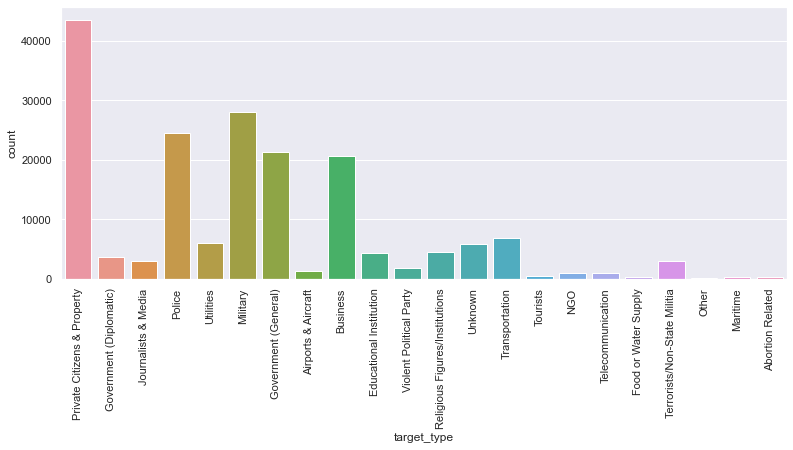

In [24]:
plt.figure(figsize = (13,5))
sns.countplot(x = data['target_type'])
plt.xticks(rotation = 90)
print(data['target_type'].value_counts())

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64


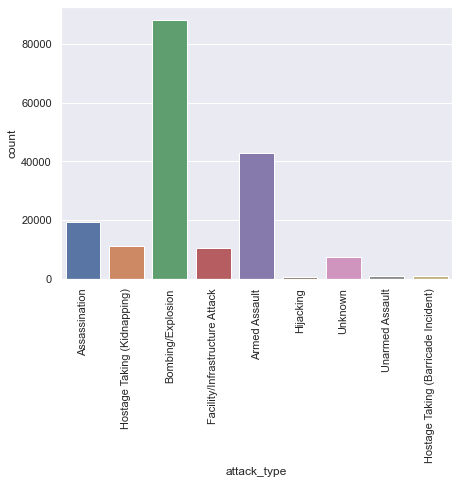

In [25]:
plt.figure(figsize = (7,5))
sns.countplot(x = data['attack_type'])
plt.xticks(rotation = 90)
print(data['attack_type'].value_counts())

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Name: weaptype, dtype: int64


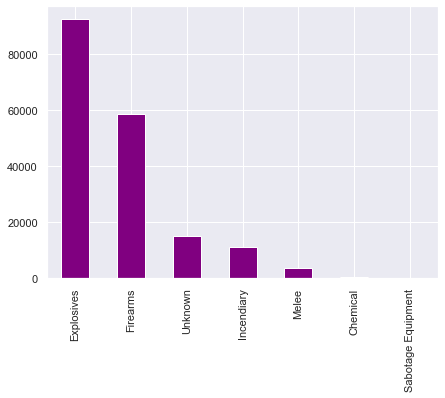

In [26]:
plt.figure(figsize = (7,5))
data['weaptype'].value_counts().head(7).plot(kind = 'bar',color = 'purple')
print(data['weaptype'].value_counts().head(7))

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Name: gname, dtype: int64


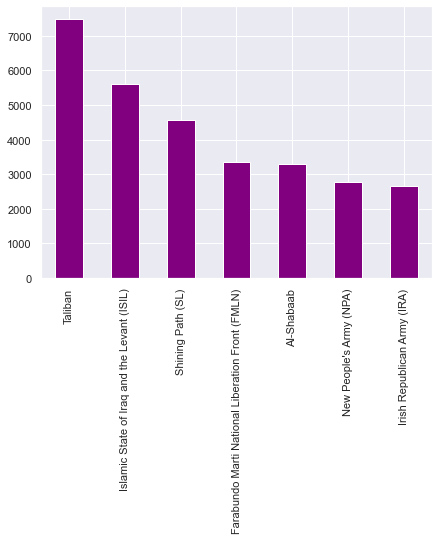

In [27]:
plt.figure(figsize = (7,5))
data['gname'].value_counts()[1:8].plot(kind = 'bar',color = 'purple')
print(data['gname'].value_counts()[1:8])

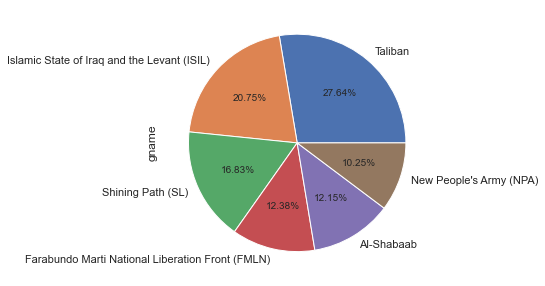

In [28]:
plt.figure(figsize = (7,5))
data['gname'].value_counts()[1:7].plot.pie(autopct='%1.2f%%')
plt.show()

## Conclusion
#### 1 - Regions Middle East & North Africa and South Asia are HOT ZONES of terrorism...!!!
#### 2 - Country Iraq and city Baghdad are HOT ZONES of terrorism...!!!
#### 3 - Regions Middle East & North Africa and South Asia recorded more fatalities as compared to other regions...!!!
#### 4 - Country Iraq and city Baghdad recorded more fatalities as compared to other countries and cities...!!!
#### 5 - Private Citizens & Property, Military, Police are targeted most in terror attacks...!!!
#### 6 - Bombing/Explosion, Armed Assault, Assassination these are top three attack types...!!!
#### 7 - Explosives, Firearms are mostly used in terror attacks...!!!

## Thank You...!!!